#Introduction

There was a very famous Industrialist. With time he was able to manage his company as he was getting older day by day. One day he had thrown a party and announces that his Son will be MD of the Company.

But with time company profit rate is declining now and his Son is really worried about his family and company reputation. So one of his friend introduces him to a very good Data Scientist. He had handed over him the company's data of past years.
Now it's DS work to find the reason that why owner's company is facing losses.
 

##Problem Statement

Choosing the right Strategic decision-making policies for selling the right products to the right customers at the right time, such that the company can increase it's profit.

###Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd'/content/drive/MyDrive/ColabNotebooks/Online Retail'

/content/drive/MyDrive/ColabNotebooks/Online Retail


In [ ]:
ls

'Online Retail.xlsx'


###Importing Dependencies

In [ ]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            # For simple Exploratory data analysis
import matplotlib as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



###Importing DataSet

In [ ]:
data=pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


###DATA PROFILING

In [ ]:
data.shape

(541909, 8)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [63]:
print(f'StockCode: {data.StockCode.unique()}\n')
print(f'CustomerID: {data.CustomerID.unique()}\n')
print(f'Country: {data.Country.unique()}\n')
print(f'Description: {data.Description.unique()}\n')
No_of_country=len(data['Country'].unique())
print("Total countries",No_of_country)

StockCode: ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]

CustomerID: [17850. 13047. 12583. ... 13298. 14569. 12713.]

Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Total countries 38


####Total No of Countries are 38

In [ ]:
data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


####Observation

There are some of columns which have missing values.There are some columns which has more than 100k missing values.

In [21]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As there are some null values and we can't fill them. So we are dropping them

In [66]:
data=data.dropna(how='any',axis=0)

In [67]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [68]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [69]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80b0fadfd0>,
      dtype=object)

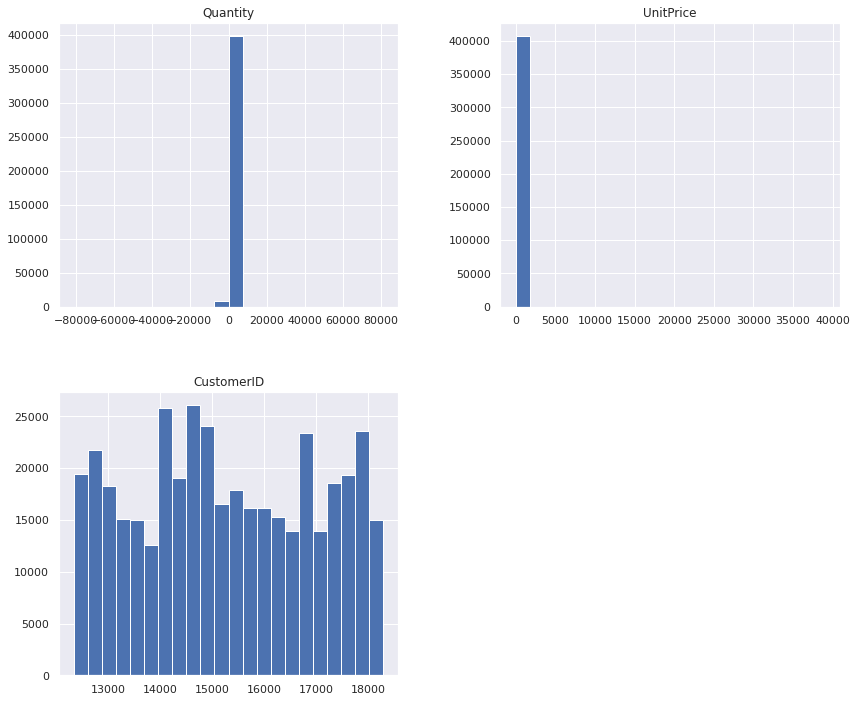

In [70]:
data.hist(bins=22,figsize=(14,12))

In [104]:
data['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

####From above observation we can say that Maximum No of Customer are from "***UK***"

In [115]:
data['TotalAmount']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Customer Type,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Normal,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Valuable,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Valuable,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Valuable,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Valuable,20.34


In [116]:
data['TotalAmount'].mean()

20.401853884564613

In [117]:
data['CustomerType']=['Valuable' if data['Total Amount'][i]>=20 else 'Normal' for i in data.index]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Customer Type,TotalAmount,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Normal,15.30,Normal
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Valuable,20.34,Valuable
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Valuable,22.00,Valuable
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Valuable,20.34,Valuable
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Valuable,20.34,Valuable


In [123]:
data["CustomerType"].value_counts()

Normal      320421
Valuable     86408
Name: CustomerType, dtype: int64

In [119]:
data.groupby(data['Country']).count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Amount,Customer Type,TotalAmount,CustomerType
Country,,,,,,,,,,,
Australia,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
Austria,401,401,401,401,401,401,401,401,401,401,401
Bahrain,17,17,17,17,17,17,17,17,17,17,17
Belgium,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069
Brazil,32,32,32,32,32,32,32,32,32,32,32
Canada,151,151,151,151,151,151,151,151,151,151,151
Channel Islands,758,758,758,758,758,758,758,758,758,758,758
Cyprus,622,622,622,622,622,622,622,622,622,622,622
Czech Republic,30,30,30,30,30,30,30,30,30,30,30


###DATA VISUALIZATION

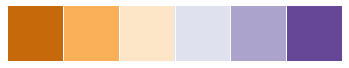

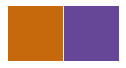

In [120]:
sns.palplot(sns.color_palette('PuOr'))
pal = sns.color_palette('PuOr', 6) 
pal.as_hex() 

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors) 
sns.palplot(sns.color_palette(sns_colors)) 

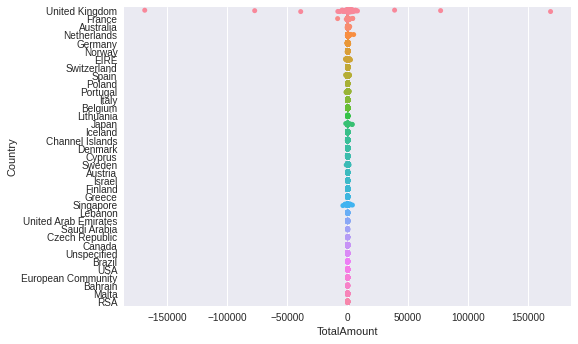

In [139]:
sns.stripplot(y='Country',x='TotalAmount',data=data,s=5)

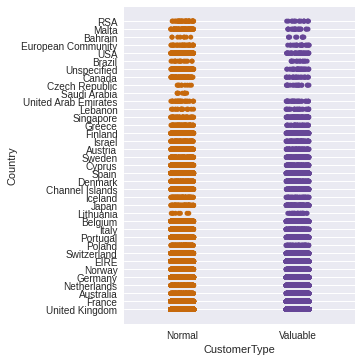

In [140]:
sns.catplot(x='CustomerType',y='Country',data=data,s=5)

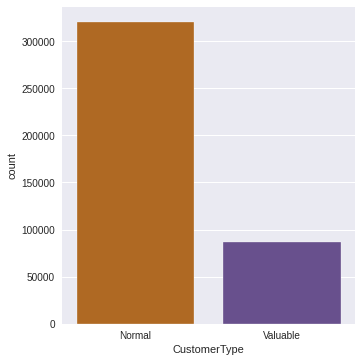

In [147]:
sns.catplot(x='CustomerType',
            kind="count",
           data=data)

###CONCLUSION



*   We can clearly see that Maximum Number of Customers from UK
*   Most of the products are sold in UK too.
*   We don't have any valueable customer in Soudi Arabia.


